In [20]:
import numpy as np

 ## Assembling the Mass and Stiff Matrix

In [ ]:
def MK(n):
    x = np.linspace(0,1,n)
    h = x[1]-x[0]
    
    M = np.zeros((n,n))
    K = np.zeros((n,n))
    
    
    M[0,0:2] = np.array([2,1])
    M[-1,:] = M[0,::-1]
    
    K[0,0:2] = np.array([1,-1])
    K[-1,:] = K[0,::-1]
    
    for i in range(1,n-1):
        M[i,i-1:i+2] = np.array([1,4,1])
        K[i,i-1:i+2] = np.array([-1,2,-1])
    
    return (h/6)*M , (1/h)*K 

In [22]:
M,K = MK(5)

In [23]:
M
K

array([[ 4., -4.,  0.,  0.,  0.],
       [-4.,  8., -4.,  0.,  0.],
       [ 0., -4.,  8., -4.,  0.],
       [ 0.,  0., -4.,  8., -4.],
       [ 0.,  0.,  0., -4.,  4.]])

## Assembling the load vector

In [24]:
pi = np.pi
c = 1 + pi**2
n = 5
x = np.linspace(0,1,n)
h = x[1] - x[0]
# integral of bcos*pi*x
def I0(a,b):
    return (np.sin(pi*b) - np.sin(pi*a))/pi
    


#integral of xcos*pi*x
def I1(a,b):
    return (b*np.sin(pi*b) - a*np.sin(pi*a)) / pi + (np.cos(pi*b) - np.cos(pi*a)) / pi**2


# loop to assemble F

def f(x):
    return (1+pi**2)*np.cos(pi*x)

f_new = f(x)
F = np.zeros(n)

for i in range(n-1):
    a = x[i]
    b = x[i+1]
    F1 =(c/h) *(b*I0(a,b)-I1(a,b)) 
    F2 = (c/h) * (I1(a,b)-a*I0(a,b))
    
    F[i] += F1
    F[i+1] += F2


    

In [25]:
F

nF = M@f_new
print(nF)

[ 1.22604916e+00  1.73389535e+00  1.84217082e-16 -1.73389535e+00
 -1.22604916e+00]


In [26]:
# assembling A

A = M + K

# solving alpha
alpha = np.linalg.solve(A,F)

print(alpha)

[ 1.00460073e+00  7.10359988e-01  1.39384415e-15 -7.10359988e-01
 -1.00460073e+00]


Solving for a matrix of matrices.

In [28]:
print(A)

[[ 4.         -4.          0.          0.          0.          4.08333333
  -3.95833333  0.          0.          0.        ]
 [-4.          8.         -4.          0.          0.         -3.95833333
   8.16666667 -3.95833333  0.          0.        ]
 [ 0.         -4.          8.         -4.          0.          0.
  -3.95833333  8.16666667 -3.95833333  0.        ]
 [ 0.          0.         -4.          8.         -4.          0.
   0.         -3.95833333  8.16666667 -3.95833333]
 [ 0.          0.          0.         -4.          4.          0.
   0.          0.         -3.95833333  4.08333333]
 [ 0.08333333  0.04166667  0.          0.          0.         -4.
   4.         -0.         -0.         -0.        ]
 [ 0.04166667  0.16666667  0.04166667  0.          0.          4.
  -8.          4.         -0.         -0.        ]
 [ 0.          0.04166667  0.16666667  0.04166667  0.         -0.
   4.         -8.          4.         -0.        ]
 [ 0.          0.          0.04166667  0.1666666

In [32]:
# constructing F


pi = np.pi


def F(x,M):
    f = (pi**4 + pi**2 +1) * np.cos(pi*x)
    f = M@f
    
    # represent the zeros
    z = np.zeros(n)
    
    return np.hstack((f,z))


    

## Handling 

In [37]:
import matplotlib.pyplot as plt

(10, 10)
(20, 20)
(40, 40)
(80, 80)
(160, 160)
(200, 200)


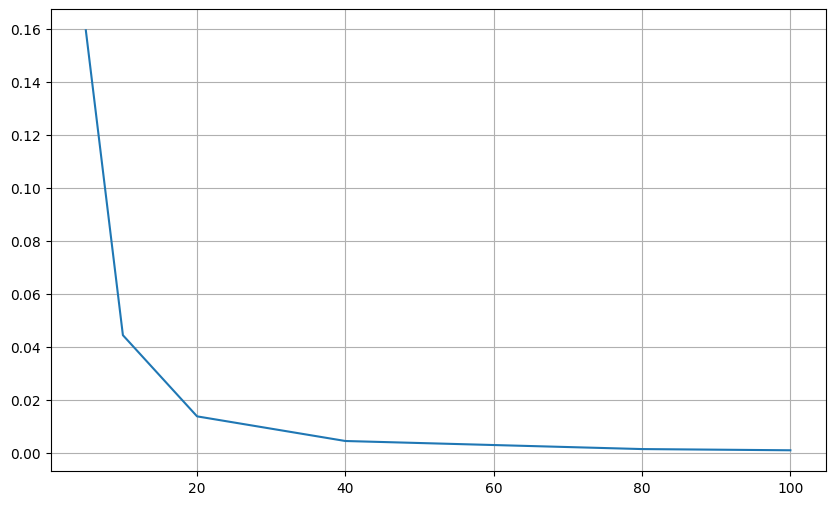

In [43]:
steps = [5,10,20,40,80,100]
err_u = []
err_v = []
for n in steps:
    M,K = MK(n)
    
    x = np.linspace(0,1,n)
    force_func = F(x,M)
    
    u_exact = np.cos(pi*x)
    v_exact = (pi**2)* np.cos(pi*x)
    
    A = np.block([[K,K+M],[M,-K]])
    print(A.shape)
    
    linear_solve = np.linalg.solve(A,force_func)
    v_vector = linear_solve[:n]
    u_vector = linear_solve[n:]
    
    err_u.append(np.linalg.norm(abs(u_exact - u_vector)))
    err_v.append( np.linalg.norm(abs(v_exact - v_vector)))
    # print("error of u")
    # print(err_u)
    # print("error of v")
    # print(err_v)
    
# print(len(err_u),len(n))
plt.figure(figsize=(10,6))
plt.plot(steps,err_u)
plt.grid(True)
plt.show()
    

In [ ]:
linear_solve

array([ 9.42954406e+00,  6.66769455e+00, -2.66453526e-15, -6.66769455e+00,
       -9.42954406e+00,  9.07852995e-01,  6.41949009e-01,  1.26682206e-15,
       -6.41949009e-01, -9.07852995e-01])

In [ ]:
v_vector

array([ 9.42954406e+00,  6.66769455e+00, -2.66453526e-15, -6.66769455e+00,
       -9.42954406e+00])

In [ ]:
u_vector

array([ 9.07852995e-01,  6.41949009e-01,  1.26682206e-15, -6.41949009e-01,
       -9.07852995e-01])